In [31]:
import pandas as pd

sensus = {
    'diameter': [10, 14, 15],
    'lebar': [20, 14, 15],
    'jk': ['FDR', 'Michellin', 'Maxxis']
}

sensus_df = pd.DataFrame(sensus)
sensus_df

,diameter,lebar,jk
0,10,20,FDR
1,14,14,Michellin
2,15,15,Maxxis


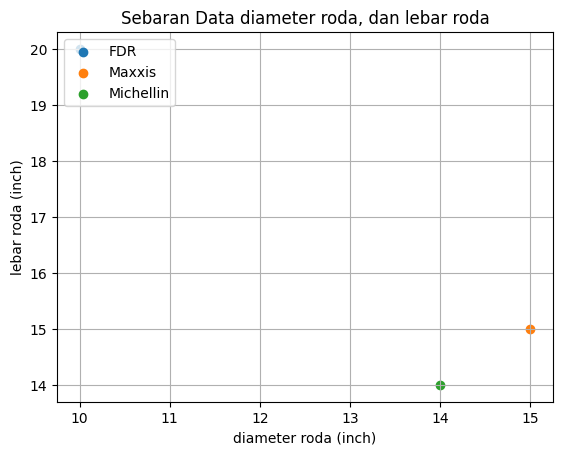

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['diameter'], d['lebar'], label=jk)

plt.legend(loc='upper left')
plt.title('Sebaran Data diameter roda, dan lebar roda')
plt.xlabel('diameter roda (inch)')
plt.ylabel('lebar roda (inch)')
plt.grid(True)
plt.show()

In [47]:
import numpy as np

X_train = np.array(sensus_df[['diameter', 'lebar']])
y_train = np.array(sensus_df['jk'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[10 20]
 [14 14]
 [15 15]]

y_train: ['FDR' 'Michellin' 'Maxxis']


In [34]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[1 0 0]
 [0 0 1]
 [0 1 0]]


In [35]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [1 0 0 0 0 1 0 1 0]


In [44]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [61]:
diameter_roda = 14
lebar_roda = 14
X_new = np.array([diameter_roda, lebar_roda]).reshape(1, -1)
X_new

array([[14, 14]])

In [60]:
y_new = model.predict(X_new)
y_new

array(['FDR'], dtype=object)

In [64]:
lb.inverse_transform(y_new)

AxisError: axis 1 is out of bounds for array of dimension 1

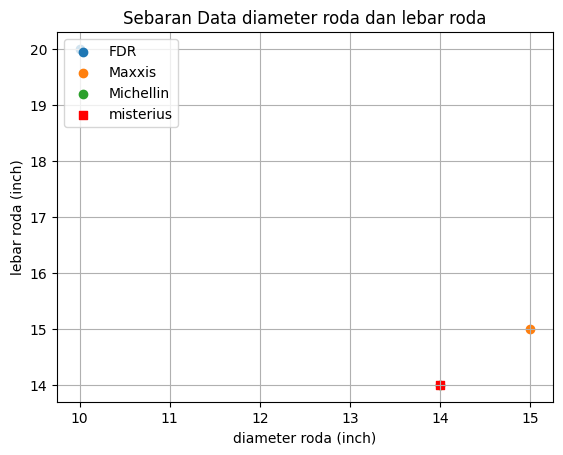

In [55]:
fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['diameter'], d['lebar'], label=jk)

plt.scatter(diameter_roda,
            lebar_roda,
            marker='s',
            color='red',
            label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran Data diameter roda dan lebar roda')
plt.xlabel('diameter roda (inch)')
plt.ylabel('lebar roda (inch)')
plt.grid(True)
plt.show()

In [63]:
misterius = np.array([diameter_roda, lebar_roda])
misterius

array([14, 14])

In [65]:
X_train

array([[10, 20],
       [14, 14],
       [15, 15]], dtype=int64)

In [66]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in X_train]
data_jarak

[7.211102550927978, 0.0, 1.4142135623730951]

In [67]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

,diameter,lebar,jk,jarak
1,14,14,Michellin,0.000000
2,15,15,Maxxis,1.414214
0,10,20,FDR,7.211103


In [68]:
X_test = np.array([[168, 65], [180, 96], [160, 52], [169, 67]])
y_test = lb.transform(np.array(['', 'pria', 'wanita', 'wanita'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}')

X_test:
[[168  65]
 [180  96]
 [160  52]
 [169  67]]

y_test:
[0 0 0 0 0 0 0 0 0 0 0 0]


In [69]:
y_pred = model.predict(X_test)
y_pred

array(['FDR', 'FDR', 'FDR', 'FDR'], dtype=object)

In [71]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy: {acc}')

ValueError: Found input variables with inconsistent numbers of samples: [12, 4]

In [72]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)

print(f'Precission: {prec}')

ValueError: Found input variables with inconsistent numbers of samples: [12, 4]

In [73]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print(f'Recall: {rec}')

ValueError: Found input variables with inconsistent numbers of samples: [12, 4]

In [74]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f'F1-score: {f1}')

ValueError: Found input variables with inconsistent numbers of samples: [12, 4]

In [75]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)

print(f'Classification Report:\n{cls_report}')

ValueError: Found input variables with inconsistent numbers of samples: [12, 4]

In [1]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc}')

NameError: name 'y_test' is not defined